In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
xls = pd.ExcelFile('cust_journey/fin_dist.xlsx')

In [3]:
sheet1 = xls.parse(0)
sheet1.head()

,Building,Month,Year,Category,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565
4,Yorkdale Shopping Centre,11,2017,Electronics,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079


In [4]:
sheet1.describe()

,Month,Year,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
count,481.000000,481.0,4.810000e+02,4.810000e+02,481.000000,4.810000e+02,481.000000,481.000000,481.000000,481.000000
mean,11.505198,2017.0,1.735163e+07,8.548292e+05,18.777360,9.996678e+05,227.322963,230.796360,116473.879418,5788.224532
std,0.500494,0.0,1.979281e+07,2.301586e+06,7.202537,2.192383e+07,186.106869,368.962696,206579.272876,15737.456046
min,11.000000,2017.0,7.385033e+04,1.000000e-02,3.570000,0.000000e+00,60.981500,0.000000,1081.000000,0.000000
25%,11.000000,2017.0,2.381769e+06,1.700000e+05,10.150000,1.519000e+01,105.891200,82.472700,16443.000000,1153.000000
50%,12.000000,2017.0,9.586273e+06,3.107660e+05,19.050000,2.305000e+01,167.668500,137.104700,36619.000000,2250.000000
75%,12.000000,2017.0,2.396680e+07,7.301230e+05,25.700000,3.372000e+01,267.989200,257.717600,94231.000000,4349.000000
max,12.000000,2017.0,7.699292e+07,3.260187e+07,40.230000,4.808271e+08,1511.455700,5771.543000,801525.000000,189111.000000


In [5]:
subset=sheet1[['Month', 'Category','Cat_Sales_PSF','Tenant']]
subset.head()

,Month,Category,Cat_Sales_PSF,Tenant
0,11,Children & Infants Apparel,84.9217,"Childrens Place, The"
1,11,Children & Infants Apparel,84.9217,Gap Kids
2,11,Children & Infants Apparel,84.9217,Gymboree
3,11,Children & Infants Apparel,84.9217,Kids Foot Locker
4,11,Electronics,478.7832,Apple


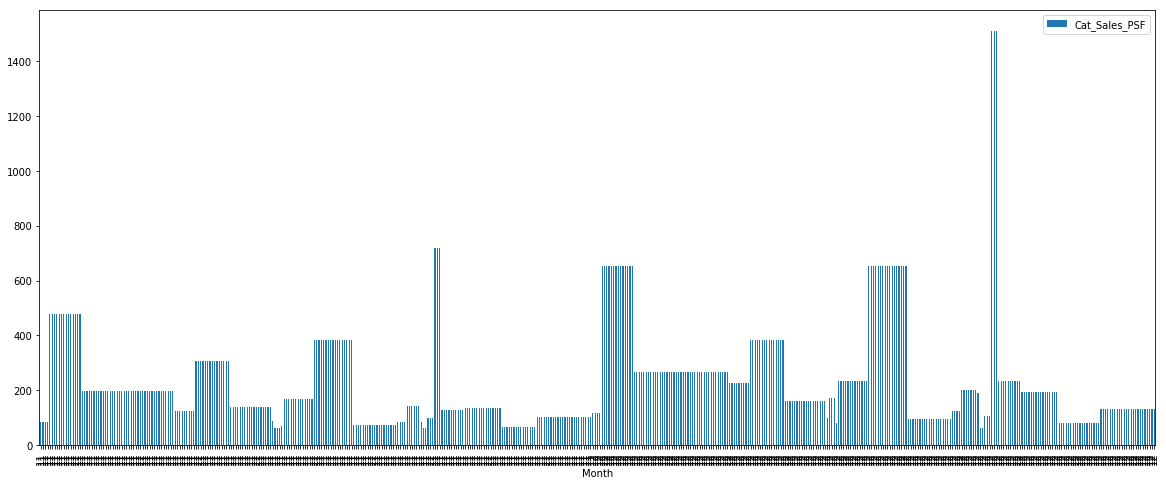

In [6]:
subset.plot(x='Month',y='Cat_Sales_PSF',kind='bar', figsize=(20,8))
plt.show()

In [7]:
sale_month=subset.pivot_table(index=['Tenant','Cat_Sales_PSF','Category'])
sale_month.head(10)

Month
Tenant                         Cat_Sales_PSF Category                             
A & W                          304.9474      Food Court                         11
                               382.1726      Food Court                         12
Aldo                           138.1363      Footwear                           11
                               161.0674      Footwear                           12
Aldo Accessories               123.5171      Fashion Accessories                11
                               225.7114      Fashion Accessories                12
Alex and Ani                   123.5171      Fashion Accessories                11
                               225.7114      Fashion Accessories                12
AllSaints                      197.4595      Family Apparel                     11
                               267.9892      Family Apparel                     12

In [8]:
sale_month.describe()

,Month
count,481.000000
mean,11.505198
std,0.500494
min,11.000000
25%,11.000000
50%,12.000000
75%,12.000000
max,12.000000


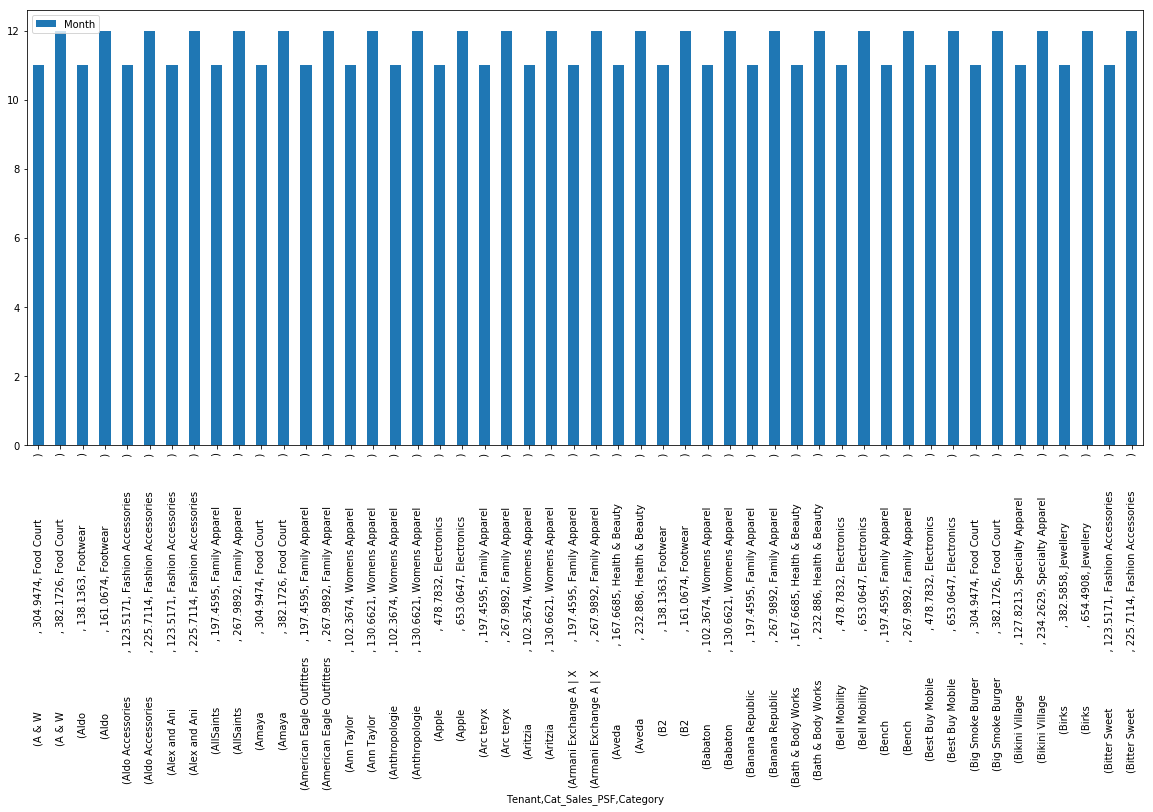

In [9]:
sale_month.head(50).plot(kind='bar', figsize=(20,8))
plt.show()

In [10]:
sale_month.plot(x=sale_month['Month'], y= sale_month['Cat_Sales_PSF'], kind='bar')
plt.show()

KeyError: 'Cat_Sales_PSF'

In [ ]:
sheet1.set_index('Category', inplace=True)
sheet1.head()

In [ ]:
sale_psf=sheet1['Cat_Sales_PSF']
# store=sheet1['Tenant']
# category=sheet1['Category']
sale_psf.head()
# store.head()

In [ ]:
sort_by_psf = sheet1.sort_values(['Cat_Sales_PSF'], ascending=False)
sort_by_psf.head(20)

In [ ]:
sort_by_psf.drop_duplicates(inplace=True)
sort_by_psf

In [ ]:
sort_by_psf.head(30).plot(kind='barh')
plt.show()

In [ ]:
name_loc = xls.parse(2)
name_loc.drop_duplicates(inplace=True)

In [ ]:
print("Column headings:", name_loc.columns)

In [ ]:
name_loc

In [ ]:
name_loc.set_index('Unit # ', inplace=True)

In [ ]:
name_loc.head()

In [ ]:
name_loc.drop(['Unit #'])
print("Column headings:", name_loc.columns)

In [ ]:
name_loc.rename(columns={'Unit # ':'unit', 'Tenant':'store'}, inplace=True)
name_loc.head()

In [ ]:
print("Column headings:", name_loc.columns)

In [ ]:
df1.dtypes

In [ ]:
df1['day'] = pd.DatetimeIndex(df1['time_start']).day
df1['month'] = pd.DatetimeIndex(df1['time_start']).month
df1['year'] = pd.DatetimeIndex(df1['time_start']).year

In [ ]:
import dateutil
df1['date'] = df1['time_start'].apply(dateutil.parser.parse, yearfirst=True)

In [ ]:
df1['week'] = df1['date'].dt.week
df1.head(50)

In [ ]:
# plt.figure(figsize=(20,20))
# plt.plot( df1['day'], df1['traffic_2'])
# plt.show()

week1 = (df1['date'] > '2017-12-03') & (df1['date'] <= '2017-12-09')
week2 = (df1['date'] > '2017-12-10') & (df1['date'] <= '2017-12-16')
week3 = (df1['date'] > '2017-12-17') & (df1['date'] <= '2017-12-23')
week4 = (df1['date'] > '2017-12-24') & (df1['date'] <= '2017-12-30')
week5 = (df1['date'] > '2017-12-31') & (df1['date'] <= '2018-01-06')
week6 = (df1['date'] > '2018-01-07') & (df1['date'] <= '2018-01-13')
week7 = (df1['date'] > '2018-01-14') & (df1['date'] <= '2018-01-20')
week8 = (df1['date'] > '2018-01-21') & (df1['date'] <= '2018-01-27')
week9 = (df1['date'] > '2018-01-28') & (df1['date'] <= '2018-02-03')
week10 = (df1['date'] > '2018-02-04') & (df1['date'] <= '2018-02-10')
week11 = (df1['date'] > '2018-02-11') & (df1['date'] <= '2018-02-17')
week12 = (df1['date'] > '2018-02-18') & (df1['date'] <= '2018-02-24')

In [ ]:
mens = ['Shoppers Mens','Nadege Mens','Harry Rosen Flow','Starbucks Mens','Pandora Mens','Bvlgari Mens','Babaton Mens','FC Mens','FC Emp Mens']
womens = ['Shoppers Ladies','Babaton Ladies','Holt Renfrew Ext','Holt Flow','FC Ladies','Pandora Ladies','Nadege Ladies','Starbucks Ladies',' Bvlgari Ladies','Pandora Nursing','FC Emp Ladies']
general = ['Subway','Tim Hortons','Source','Go Transit', 'Scotia Flow', 'Ent G Microsoft', 'Rest H CO', 'Nadege Family', 'Starbucks Fam2', 'Starbucks Fam1',
'Pandora Family','Nordstrom CO','Ent A3 Sport Chek','Ent J3 Shoppers','Ent A2 Jamies','Cheescake CO','Rest H Ext','Bay West J3']
parking =['FC Esc N','E Parkade P2-N','Ent E','F Parkade P2','E Parkade P3-S','Ent J2','FC Elev S','E Parkade P4-N',
'E Parkade P5-N','E Parkade P1-N','Ent J1','E Parkade P2-S','E Parkade P4-S','E Parkade P5-S','E Parkade P1-S','F Parkade P1',
'FC Elev N','E Parkade P3-N','Ent F Valet','E Parkade P1-E','F Parkade Holt P2','Nord P1 East','Bay North A1','F Parkade Holt P1','C Park Nord L2',
'E Parkade P5-E','E Parkade P4-E','C Park Nord L1','E Parkade P3-E','E Parkade P2-E','Ent H','Ent A1 PB'  ]

In [ ]:
mens_data = df1[ df1['store_name'].isin(mens)]
# week1 = mens_data[(mens_data['date'] > '2017-12-03') & (mens_data['date'] <= '2017-12-09')]

In [ ]:
# visit_mask = df1['traffic_2']
mens_mask = df1['store_name'].isin(mens)

In [ ]:
df1['mens'] = df1['store_name'].isin(mens)
df1['womens'] = df1['store_name'].isin(womens)
df1['general'] = df1['store_name'].isin(general)
df1['parking'] = df1['store_name'].isin(parking)
df1[31950:32000]

In [ ]:
traffic_men = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['mens']])['traffic_2'].sum().reset_index()
traffic_women = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['womens'] ])['traffic_2'].sum().reset_index()
traffic_men = traffic_men[ traffic_men.mens] # to extract only the values where mens==True
traffic_men.head(100)

In [ ]:
traffic_men.drop(['mens'], axis=1,inplace=True)

In [ ]:
traffic_men.rename(index=str, columns={'traffic_2':'men'})

In [ ]:
traffic_women = traffic_women[ traffic_women.womens] # to extract only the values where womens==True
traffic_women.rename(index=str, columns={'traffic_2':'women'})
traffic_women.head(100)

In [ ]:
combined = traffic_men
combined.rename(index=str, columns={'traffic_2':'men'})

In [ ]:
combined.columns.tolist()

In [ ]:
combined['women'] =  traffic_women['traffic_2']
combined.head(100)

In [ ]:
combined.rename(index=str, columns={'traffic_2':'men'},inplace=True)

In [ ]:
combined.sort_values(by=['year', 'week'], inplace=True)

combined2 = traffic_men.append(traffic_women)
combined2.reset_index(drop=True)
combined2.head(100)

In [ ]:
combined.plot(x='week', y=['men', 'women'], kind='bar')
plt.show()

In [ ]:
total_traffic = df1.groupby( [ df1['week'], df1['month'], df1['year'], df1['parking']])['traffic_2'].sum().reset_index()
total_traffic = total_traffic[ total_traffic.parking]
total_traffic.rename(index=str, columns={'traffic_2':'visitors'},inplace=True)
total_traffic.head()

In [ ]:
total_traffic.sort_values(by=['year', 'week'], inplace=True)

In [ ]:
total_traffic.plot(x='week', y=['visitors'], kind='bar')
plt.show()